In [1]:
print("CUSTOMER SEGMENTATION ANALYSIS:");

CUSTOMER SEGMENTATION ANALYSIS:


In [10]:
#1.data preparation:As a first step, We load all the modules!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline
print("Succesful!");

Succesful!


In [12]:
# read the datafile
dataset=pd.read_csv('/tmp/Mall_Customers.csv')
dataset.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [13]:
#total rows and colums in the dataset
dataset.shape

(200, 5)

In [14]:
dataset.info() # there are no missing values as all the columns has 200 entries properly

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [15]:
#Missing values computation
dataset.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [16]:
print("So,Data preparation for our model is done as there are no missing values!");

So,Data preparation for our model is done as there are no missing values!


In [17]:
print("Now,Selecting features columns for our data!")

Now,Selecting features columns for our data!


In [19]:
df=dataset.iloc[:,3:5]

In [20]:
#Features Matrix
X=df.values

First Step is to find the Number of Cluster


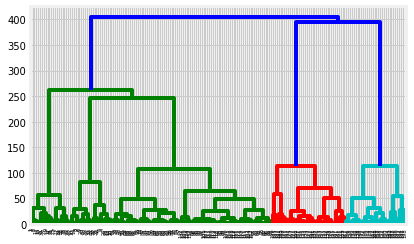

In [26]:
print("First Step is to find the Number of Cluster");
import scipy
from scipy.cluster import hierarchy
dendro=hierarchy.dendrogram(hierarchy.linkage(X,method='ward'))

In [25]:
print("From the above graph we can see that optimal number of cluster will be 5.")

From the above graph we can see that optimal number of cluster will be 5.


Text(0, 0.5, 'wcss: sum of dist. of sample to their closest cluster center')

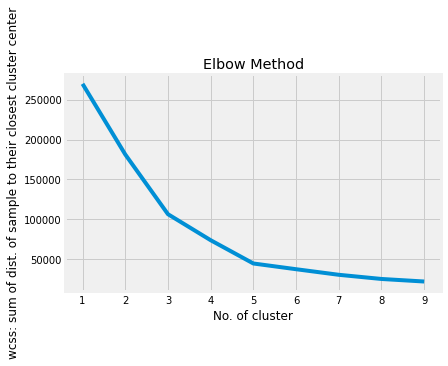

In [27]:
#elbow method
#Finding the optimal number of cluster using Elbow method
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,init='k-means++',)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,10),wcss)
plt.title('Elbow Method')
plt.xlabel('No. of cluster')
plt.ylabel('wcss: sum of dist. of sample to their closest cluster center' )
 #inertia_ is the formula used to segregate the data points into clusters

In [28]:
print("From elbow method also, the optimal number of cluster will be 5.")

From elbow method also, the optimal number of cluster will be 5.


In [29]:
print("CUSTOMER SEGMENTATION ANALYSIS:")

CUSTOMER SEGMENTATION ANALYSIS:


In [31]:
#KMeans Clustering Model with 5 cluster
kmeans_1=KMeans(n_clusters=5)
kmeans_1.fit(X)
cluster_pred=kmeans_1.predict(X)
cluster_pred_2=kmeans_1.labels_
cluster_center=kmeans_1.cluster_centers_

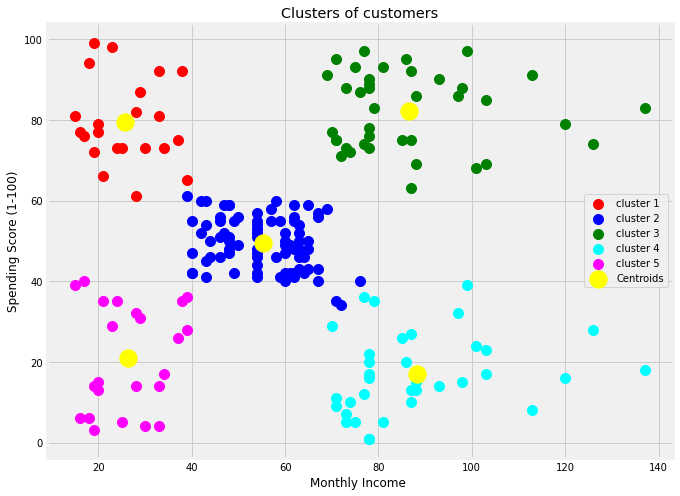

In [32]:
# Visualising the clusters
plt.figure(figsize=(10,8))
plt.scatter(X[cluster_pred==0,0],X[cluster_pred==0,1], s = 100, c = 'red', label ='cluster 1' )
plt.scatter(X[cluster_pred==1,0],X[cluster_pred==1,1], s = 100, c = 'blue', label ='cluster 2' )
plt.scatter(X[cluster_pred==2,0],X[cluster_pred==2,1], s = 100, c = 'green', label ='cluster 3' )
plt.scatter(X[cluster_pred==3,0],X[cluster_pred==3,1], s = 100, c = 'cyan', label = 'cluster 4')
plt.scatter(X[cluster_pred==4,0],X[cluster_pred==4,1], s = 100, c = 'magenta', label = 'cluster 5')
plt.scatter(cluster_center[:,0],cluster_center[:,1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Monthly Income ')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [33]:
print("Visualising the clusters:");
print("The cluster with high Monthly income and high Spending score can be called as Target group");
print("The cluster with high income but low spending score can be called as Careful group");
print("The cluster with low income and high spending score can be called as Careless group");
print("The cluster with low income and low spending score can be called as Sensible group");
print("one that is in the middle is Standard group.")

Visualising the clusters:
The cluster with high Monthly income and high Spending score can be called as Target group
The cluster with high income but low spending score can be called as Careful group
The cluster with low income and high spending score can be called as Careless group
The cluster with low income and low spending score can be called as Sensible group
one that is in the middle is Standard group.


In [37]:
print("How this will help?For new promotional offer, instead of calling each customer, first we will focus on Target group of customer.Different type of promotional offer will we suited for different group of customer:For example a sense of compitition to win a prize will be suited for one type of cluster while, buy one and get one free will be suited for another group of customer. Based on each cluster of customer we can choose different strategy of promotion.");

How this will help?For new promotional offer, instead of calling each customer, first we will focus on Target group of customer.Different type of promotional offer will we suited for different group of customer:For example a sense of compitition to win a prize will be suited for one type of cluster while, buy one and get one free will be suited for another group of customer. Based on each cluster of customer we can choose different strategy of promotion.
